# **Curso de Inteligencia Artificial**
---
<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://github.com/AntonioEscamilla/images-in-readMe/raw/master/Curso%20IA/upb%20logo.jpg", align="left", width="350">
</div>

### **Facultad en Tecnologías de la Información y la Comunicación**

### Escuela de Ingenierías

### Universidad Pontificia Bolivariana

---

## **Docente: Ph.D. Antonio Escamilla**

# **Aprendizaje No Supervisado: Clustering**

En este cuaderno, se cubriran los siguientes temas:

### 1. Preparación de Datos
### 2. Aprendizaje del Modelo
### 3. Evaluación del Modelo
### 4. Perfilamiento

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Preparación de Datos

*  Carga de los datos
*  Análisis exploratorio de los datos
*  Limpieza de atípicos y nulos
*  Transformación de datos (k-means sólo analiza variables numéricas)



In [3]:
print("Descargando Assets a Colab")
!wget --quiet --show-progress --output-document=Empleados.xlsx https://drive.google.com/uc?id=18gAJQrcqR4rUr_6GLTjKm3mQQLhYtJ3t&export=download


Descargando Assets a Colab
Empleados.xlsx      100%[===================>]  31.86K  --.-KB/s    in 0s      


In [4]:
data = pd.read_excel("Empleados.xlsx", sheet_name=0)
data.head()

,Sueldo,Casado,Carro,Hijos,Alq_Prop,Sindicato,Incapacidades,Antiguedad,Sexo
0,10000,Sí,No,0,Alquiler,No,7,15,H
1,20000,No,Sí,1,Alquiler,Sí,3,3,M
2,15000,Sí,Sí,2,Prop,Sí,5,10,H
3,30000,Sí,Sí,1,Alquiler,No,15,7,M
4,10000,Sí,Sí,0,Prop,Sí,1,6,H


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sueldo         270 non-null    int64 
 1   Casado         270 non-null    object
 2   Carro          270 non-null    object
 3   Hijos          270 non-null    int64 
 4   Alq_Prop       270 non-null    object
 5   Sindicato      270 non-null    object
 6   Incapacidades  270 non-null    int64 
 7   Antiguedad     270 non-null    int64 
 8   Sexo           270 non-null    object
dtypes: int64(4), object(5)
memory usage: 19.1+ KB


In [6]:
#Corrección del tipo de datos object a categorías
data['Casado']=data['Casado'].astype('category')
data['Carro']=data['Carro'].astype('category')
data['Alq_Prop']=data['Alq_Prop'].astype('category')
data['Sindicato']=data['Sindicato'].astype('category')
data['Sexo']=data['Sexo'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Sueldo         270 non-null    int64   
 1   Casado         270 non-null    category
 2   Carro          270 non-null    category
 3   Hijos          270 non-null    int64   
 4   Alq_Prop       270 non-null    category
 5   Sindicato      270 non-null    category
 6   Incapacidades  270 non-null    int64   
 7   Antiguedad     270 non-null    int64   
 8   Sexo           270 non-null    category
dtypes: category(5), int64(4)
memory usage: 10.5 KB


In [7]:
data.describe()

,Sueldo,Hijos,Incapacidades,Antiguedad
count,270.000000,270.000000,270.000000,270.000000
mean,21066.666667,0.733333,5.266667,8.200000
std,11913.068018,0.999628,6.877797,5.265868
min,8000.000000,0.000000,0.000000,1.000000
25%,10000.000000,0.000000,1.000000,5.000000
50%,20000.000000,0.000000,3.000000,7.000000
75%,30000.000000,2.000000,7.000000,12.000000
max,50000.000000,3.000000,27.000000,20.000000


**Conocemos las variables categóricas:**

<Axes: xlabel='Casado'>

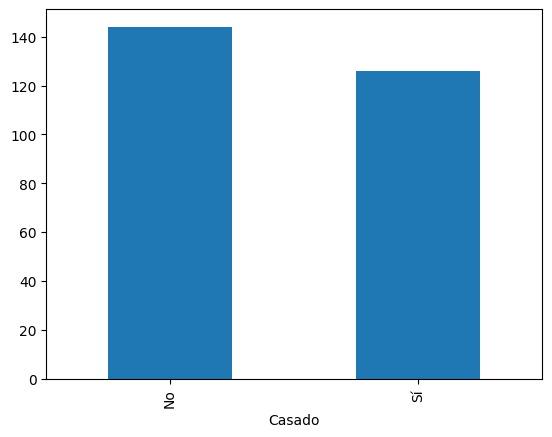

In [ ]:
data['Casado'].value_counts().plot(kind='bar')

<Axes: xlabel='Carro'>

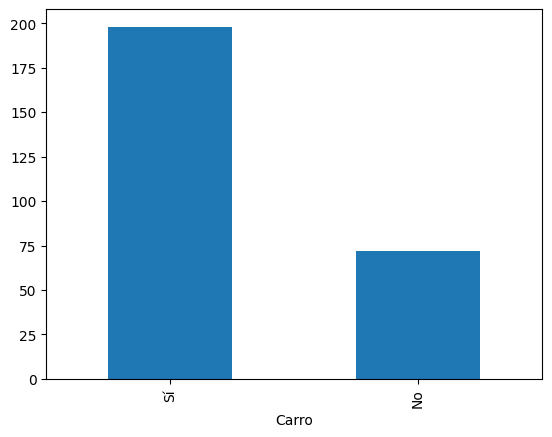

In [ ]:
data['Carro'].value_counts().plot(kind='bar')

<Axes: xlabel='Alq_Prop'>

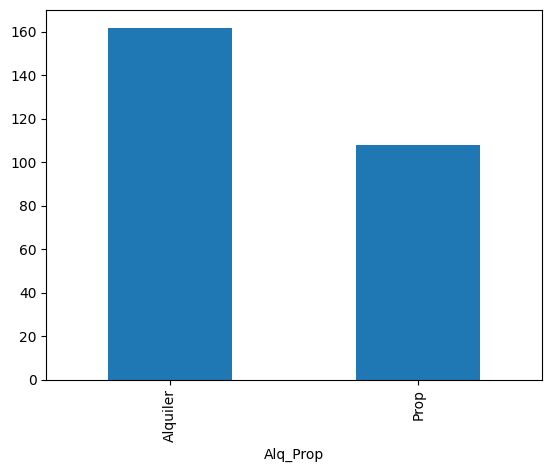

In [ ]:
data['Alq_Prop'].value_counts().plot(kind='bar')

<Axes: xlabel='Sindicato'>

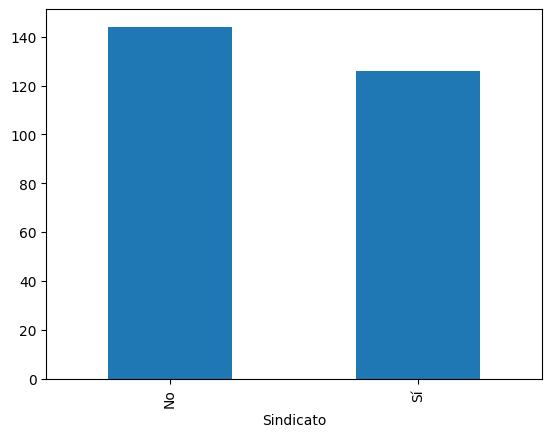

In [ ]:
data['Sindicato'].value_counts().plot(kind='bar')

<Axes: xlabel='Sexo'>

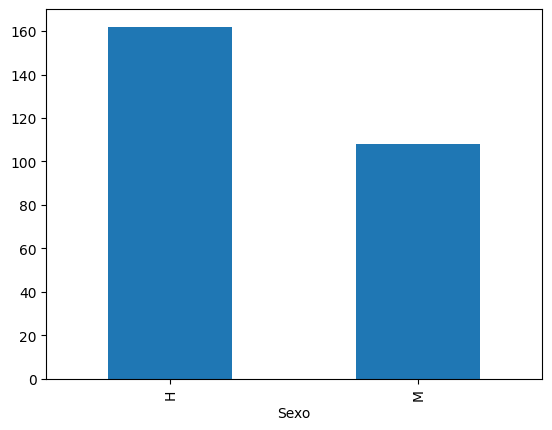

In [ ]:
data['Sexo'].value_counts().plot(kind='bar')

<Axes: >

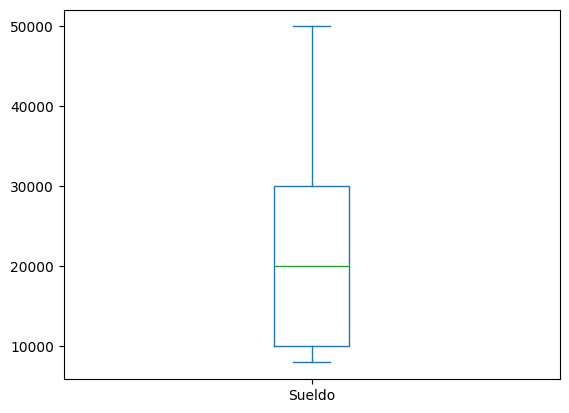

In [ ]:
data['Sueldo'].plot(kind='box')

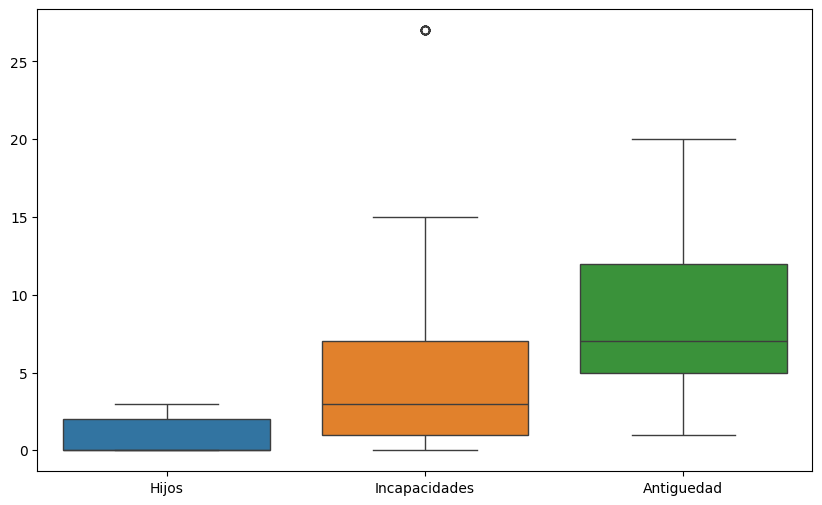

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Hijos', 'Incapacidades', 'Antiguedad']])
plt.show()

In [9]:
# Copia de los datos
data_preparada = data.copy()

# Transformar variables categóricas usando dummies
data_preparada = pd.get_dummies(data=data_preparada, columns=['Casado', 'Carro', 'Alq_Prop', 'Sindicato', 'Sexo'], drop_first=True, dtype=int)

data_preparada.head()

,Sueldo,Hijos,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Alq_Prop_Prop,Sindicato_Sí,Sexo_M
0,10000,0,7,15,1,0,0,0,0
1,20000,1,3,3,0,1,0,1,1
2,15000,2,5,10,1,1,1,1,0
3,30000,1,15,7,1,1,0,0,1
4,10000,0,1,6,1,1,1,1,0


## 1.1 Escalamiento de los datos

El escalamiento de datos es una etapa crucial en el preprocesamiento de datos antes de aplicar algoritmos de clustering como **K-means**. Esto se debe a que K-means, al igual que muchos otros algoritmos de aprendizaje automático, es sensible a la escala de las características.

**¿Por qué es tan importante?**

* **Escalas Diferentes:** K-means utiliza la distancia euclidiana para medir la similitud entre los puntos de datos. Atributos con rangos muy diferentes pueden dominar el cálculo de la distancia. Por ejemplo, si un atributo tiene un rango de 0 a 100 y otra de 0 a 1, la segunda característica tendrá un impacto mucho menor en la distancia, incluso si es igualmente importante.

* **Centroides Sesgados:** Atributos con mayor rango pueden "atraer" más a los centroides durante el proceso de clustering. Esto puede llevar a la formación de clústeres que no reflejen la verdadera estructura de los datos.

* **Interpretación de los Resultados:** Escalas diferentes dificultan la interpretación de los resultados. Si las características no están en la misma escala, es difícil comparar la importancia relativa de cada una.

`MinMaxScaler` y `StandardScaler` son dos métodos comunes de escalamiento de variables independientes en Machine Learning que se utilizan para preprocesar datos antes de aplicar algoritmos de aprendizaje automático. Descripción de las diferencias entre ambos:

**MinMaxScaler:**

* **Rango de valores:** Escala las características en un rango específico, generalmente entre 0 y 1.
* **Fórmula de escalamiento:** Para cada característica, resta el valor mínimo y luego divide por la diferencia entre el máximo y el mínimo.
* **Adecuado para algoritmos sensibles a la magnitud de las características:** Útil cuando los algoritmos de aprendizaje automático requieren que todas las características estén en la misma escala y el modelo no está sesgado por la magnitud de las características.
* **Sensible a los valores atípicos:** Los valores atípicos pueden afectar significativamente el resultado del escalamiento, especialmente si hay un número considerable de ellos.

**StandardScaler:**

Centra las características en cero y las escala según la desviación estándar.

* **Fórmula de escalamiento:** Para cada característica, resta la media y divide por la desviación estándar.
* **Distribución normal estándar:** Resultado de la transformación es una distribución normal estándar, lo que significa que la media de la característica se convierte en 0 y la desviación estándar en 1.
* **Menos afectado por valores atípicos:** La escala se basa en la desviación estándar, lo que hace que sea menos sensible a los valores atípicos en comparación con MinMaxScaler.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Usar MinMaxScaler para el escalamiento. A cuales variables?
escalador = MinMaxScaler()
escalador.fit(data_preparada)
data_preparada = escalador.transform(data_preparada)
data_preparada = pd.DataFrame(data_preparada, columns=data.columns)

# Aplicar el escalador

data_preparada.head()

,Sueldo,Casado,Carro,Hijos,Alq_Prop,Sindicato,Incapacidades,Antiguedad,Sexo
0,0.047619,0.000000,0.259259,0.736842,1.0,0.0,0.0,0.0,0.0
1,0.285714,0.333333,0.111111,0.105263,0.0,1.0,0.0,1.0,1.0
2,0.166667,0.666667,0.185185,0.473684,1.0,1.0,1.0,1.0,0.0
3,0.523810,0.333333,0.555556,0.315789,1.0,1.0,0.0,0.0,1.0
4,0.047619,0.000000,0.037037,0.263158,1.0,1.0,1.0,1.0,0.0


# 2. Aprendizaje del Modelo

### Escoger un valor óptimo de K

El método del codo (Elbow Method) es una técnica comúnmente utilizada para encontrar el número óptimo de clusters en un conjunto de datos cuando se está aplicando un algoritmo de clustering, como K-Means. La idea principal detrás del método del codo es identificar el punto en el que la adición de otro cluster no proporciona un mejor modelado de los datos, lo que se refleja en una curva de la función de coste (también conocida como inercia) frente al número de clusters que forma un "codo" o "cambio de dirección" en la gráfica.

Aquí hay una descripción paso a paso del método del codo:

1. **Aplicar el algoritmo de clustering**: Primero, aplicas el algoritmo de clustering, como K-Means, a tus datos con un rango de posibles números de clusters. Por ejemplo, puedes ejecutar K-Means para un número de clusters que va desde 1 hasta un número máximo razonable.

2. **Calcular la inercia para cada número de clusters**: Para cada configuración de clusters, calculas la inercia, que es una medida de cuán compactos están los clusters. En el caso de K-Means, la inercia es la suma de las distancias al cuadrado de cada punto al centroide de su cluster más cercano. Cuanto menor sea la inercia, más compactos serán los clusters.

3. **Trazar la curva de la función de coste (inercia) vs. número de clusters**: Luego, trazas un gráfico que muestre la inercia en el eje y (vertical) y el número de clusters en el eje x (horizontal).

4. **Identificar el "codo" en la curva**: Observa el gráfico y busca el punto en el que la inercia deja de disminuir rápidamente y comienza a aplanarse, formando un "codo" en la curva. Este punto es donde se encuentra el número óptimo de clusters según el método del codo.

5. **Seleccionar el número óptimo de clusters**: El número de clusters en el punto del "codo" se considera un buen candidato para el número óptimo de clusters. Sin embargo, la interpretación del codo puede ser subjetiva en algunos casos, y se puede requerir cierto juicio experto para seleccionar el número final de clusters a utilizar.

Sin embargo, es importante tener en cuenta que no siempre produce resultados definitivos, y en algunos casos, puede ser necesario combinar el análisis del codo con otros métodos de validación de clustering para tomar una decisión final sobre el número de clusters a utilizar.


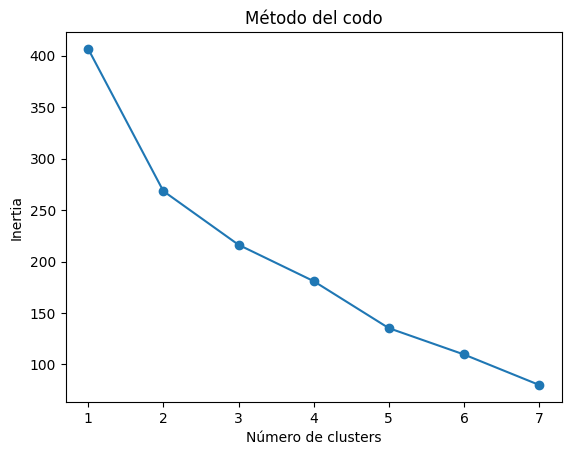

In [11]:
#Método del codo para encontrar la mejor cantidad de clusters
from sklearn.cluster import KMeans

ks = range(1, 8)
inertias = []

# entrenar diferentes modelos, en una iteración por ks
# y almacenar el valor de inertia en la lista

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_preparada)
    inertias.append(model.inertia_)

# Graficar cantidad de clusters vs inertias

plt.plot(ks, inertias, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.title('Método del codo')
plt.show()

### Selección de K = 4

El método del codo te ayuda a identificar el punto donde agregar más clusters ya no mejora significativamente la calidad del modelo, lo que se refleja en un "codo" en la gráfica de la inercia frente al número de clusters. Este punto suele ser considerado como el número óptimo de clusters para tu conjunto de datos.

### Parámetros de KMeans

- `max_iter`: Controla el número máximo de iteraciones que se realizarán en cada ejecución del algoritmo K-Means para converger a una solución.
  
- `n_init`: Controla el número de veces que se inicializará el algoritmo K-Means con diferentes centroides aleatorios, cada una con un número máximo de iteraciones especificado por `max_iter`. Se seleccionará el modelo con la menor inercia entre todas las ejecuciones.

In [12]:
k=4
model = KMeans(n_clusters=k, max_iter=100, n_init=10)
model.fit(data_preparada)

KMeans(max_iter=100, n_clusters=4, n_init=10)

# 3. Evaluación del Modelo

**Silhouette Score:** Esta métrica calcula cuán similar es un punto a su propio cluster (cohesión) en comparación con otros clusters (separación). Un valor alto de silhouette score indica clusters bien definidos.

Se calcula el *Silhouette Score* promedio para el modelo KMeans. Un Silhouette Score más cercano a 1 indica que los clusters están bien separados, mientras que un valor cercano a -1 indica que las muestras podrían haber sido asignadas al cluster incorrecto. Un valor cercano a 0 indica solapamiento entre clusters.

In [13]:
from sklearn.metrics import silhouette_score

# Etiquetas de cluster asignadas por el modelo
labels = model.labels_

# Calcula el silhouette score
silhouette_avg = silhouette_score(data_preparada, labels)

print("El Silhouette Score promedio es:", silhouette_avg)

El Silhouette Score promedio es: 0.44959679551749776


# 4. Perfilamiento

Parámetros resultantes del ajuste a los datos con KMeans en scikit-learn:

1. **`labels_`**: Este parámetro contiene las etiquetas de cluster asignadas por el modelo KMeans a cada muestra en tus datos. Cada muestra está etiquetada con el número de cluster al que pertenece.

2. **`cluster_centers_`**: Este parámetro contiene las coordenadas de los centroides finales de los clusters obtenidos después de ajustar el modelo KMeans a los datos. Cada fila en `cluster_centers_` representa las coordenadas de un centroide en el espacio de características.


In [14]:
# Crear un dataframe nuevo con los centroides de los clusters,
# usar los nombres de las columnas en data_preparada

centroides = pd.DataFrame(model.cluster_centers_, columns=data_preparada.columns.values)
centroides.round(1)

,Sueldo,Casado,Carro,Hijos,Alq_Prop,Sindicato,Incapacidades,Antiguedad,Sexo
0,0.2,0.6,0.1,0.4,1.0,1.0,1.0,0.4,0.0
1,0.4,0.1,0.1,0.4,0.0,1.0,0.3,1.0,1.0
2,0.5,0.1,0.5,0.5,0.5,0.2,0.0,0.0,0.8
3,0.2,0.0,0.0,0.2,0.0,0.7,0.0,0.7,0.0


Después de aplicar un MinMaxScaler a tus datos antes de ajustar un modelo KMeans, los centroides obtenidos también estarán en la misma escala que los datos transformados. Esto significa que las coordenadas de los centroides estarán dentro del rango especificado por el MinMaxScaler, generalmente entre 0 y 1.

**Comparación con datos originales:** Si necesitas interpretar los centroides en términos de las características originales, puedes aplicar la transformación inversa del MinMaxScaler a los centroides. Esto te dará los valores de las características en su escala original, lo que facilita la interpretación en relación con los datos originales.

In [15]:
# Se realiza una transformación inversa de los centroides
centroides= escalador.inverse_transform(centroides)
centroides = pd.DataFrame(centroides, columns=data_preparada.columns.values)

centroides.round(0)

,Sueldo,Casado,Carro,Hijos,Alq_Prop,Sindicato,Incapacidades,Antiguedad,Sexo
0,16600.0,2.0,3.0,8.0,1.0,1.0,1.0,0.0,0.0
1,26667.0,0.0,3.0,8.0,0.0,1.0,0.0,1.0,1.0
2,27500.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0,1.0
3,14333.0,0.0,1.0,6.0,0.0,1.0,0.0,1.0,0.0


### Descripción de los perfiles

* **Perfil 1:** ...
* **Perfil 2:** ...

In [16]:
#Cluster asignado a cada registro en los datos originales
data['cluster'] = model.labels_
data.head()


,Sueldo,Casado,Carro,Hijos,Alq_Prop,Sindicato,Incapacidades,Antiguedad,Sexo,cluster
0,10000,Sí,No,0,Alquiler,No,7,15,H,2
1,20000,No,Sí,1,Alquiler,Sí,3,3,M,1
2,15000,Sí,Sí,2,Prop,Sí,5,10,H,0
3,30000,Sí,Sí,1,Alquiler,No,15,7,M,2
4,10000,Sí,Sí,0,Prop,Sí,1,6,H,0


<Axes: ylabel='count'>

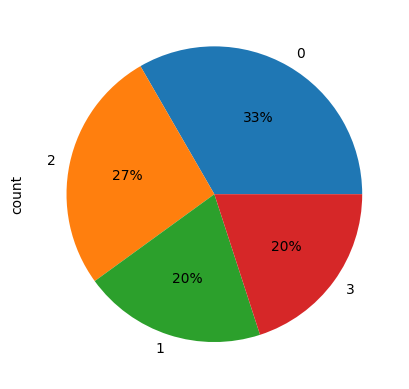

In [17]:
data["cluster"].value_counts().plot(kind='pie',autopct='%.0f%%')

In [18]:
data.to_excel('./resultados-clustering.xlsx')
centroides.to_excel('./centroides.xlsx')